# ***Questionário IV: Titanic***

## SME0828 - Introdução à Ciência de Dados

Andressa Colaço, Nº USP 12610389

O objetivo deste trabalho é desenvolver uma análise de ciência de dados do problema de classificação de passageiros do Titanic (https://www.kaggle.com/c/titanic). Procuramos classificar os passageiros como sobreviventes a partir da análise do conjunto de dados do problema. Essa tarefa busca testar outros métodos de classificação e comparar suas performances.

O trabalho pode ser dividido em algumas etapas:

1 - Formulação do problema e preparo dos dados. \\
2 - Limpeza e normalização dos dados \\
3 - Análise exploratória, Estatística Descritiva, PCA. \\
4 - Aprendizado supervisionado através da validação cruzada (conjunto de teste); Classificação: treinamento do modelo com todos os dados de treinamento; Predição dos valores no conjunto de teste; Avaliação do modelo. \\
5 - Interpretação dos resultados. \\




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

random.seed(42)
sns.set_style('darkgrid')

## ***Etapa 1: Formulação do problema e leitura dos dados***

Os atributos do conjunto de dados são:

1 - `PassengerId`: Número de identificação do passageiro; \\
2 - `Survived`: Indica se o passageiro sobreviveu ao desastre. É atribuído o valor de 0 para aqueles que não sobreviveram, e 1 para quem sobreviveu; \\
3 - `Pclass`: Classe na qual o passageiro viajou. É informado 1 para primeira classe;  2 para segunda; e 3 para terceira; \\
4 - `Name`: Nome do passageiro; \\
5 - `Sex`: Sexo do passageiro; \\
6 - `Age`: Idade do passageiro em anos; \\
7 - `SibSp`: Quantidade de irmãos e cônjuges a bordo; \\
8 - `Parch`: Quantidade de pais e filhos a bordo; \\
9 - `Ticket`: Número da passagem; \\
10 - `Fare`: Preço da passagem; \\
11 - `Cabin`: Número da cabine do passageiro; \\
12 - `Embarked`: Indica o porto no qual o passageiro embarcou. Há apenas três valores possíveis: Cherbourg, Queenstown e Southampton, indicados pelas letras “C”, “Q” e “S”, respectivamente.

Sabe-se que alguns grupos de pessoas tiveram maior taxa de sobrevivência, como mulheres, crianças e pessoas de classe alta. Vamos explorar as relações entre os atributos e sua importância para a classificação entre sobrevivente ou não nesta etapa.

Importando os dados:

In [2]:
train = pd.read_csv('data/train.csv', header=(0))
test = pd.read_csv('data/test.csv', header=(0))

FileNotFoundError: ignored

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print("Número de linhas e colunas no conjunto de treinamento:", train.shape)
print("Número de linhas e colunas no conjunto de teste:", test.shape)
attributes = list(train.columns)
train.head(10)

Número de linhas e colunas no conjunto de treinamento: (891, 12)
Número de linhas e colunas no conjunto de teste: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
print('Conjunto de teste')
test.head(10)

Conjunto de teste


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


Para obter um pouco mais de informação sobre os dados, podemos utilizar o método describe():

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Podemos ver nesta descrição algumas informações importantes sobre a distribuição dos dados: Temos uma amostra de 891 passageiros (cerca de 40% do total da tripulação do Titanic). Enquanto 38% da amostragem foi sobrevivente, a taxa real de sobrevivência foi de 32%. Vemos que a maior parte dos passageiros não estavam com seus pais ou filhos nem com irmãos ou conjûge. Os preços pagos nos bilhetes variam significantemente.

## ***Etapa 2: Limpeza e normalização dos dados***

Atributos como `ID`, `Name`, `Ticket` e` Cabin` não contribuem muito (). Logo, os retiramos. \\

\

** É possível utilizar o atributo `Name` para extrair o título pessoal do passageiro, que está diretamente relacionado com idade e classe social, mas podemos utilizar outros atributos para inferir estes. \\
*** `Cabin` pode ser um parâmetro importante, mas há muitos faltantes e ele está ligado ao preço do bilhete, logo não o consideramos.


In [ ]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [ ]:
PassengerId_test = test['PassengerId']
test.drop(['PassengerId','Name', 'Ticket', 'Cabin'],axis = 1, inplace = True)
test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


O `PassengerId` foi guardado para a submissão no Kaggle. Agora faremos a limpeza de valores nulos:

In [ ]:
train.isnull().sum().sort_values(ascending=False).head(10)

Age         177
Embarked      2
Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
dtype: int64

In [ ]:
test.isnull().sum().sort_values(ascending=False).head(10)

Age         86
Fare         1
Pclass       0
Sex          0
SibSp        0
Parch        0
Embarked     0
dtype: int64

Vemos que a idade é um atributo que possui muitos faltantes. Uma possível variação da solução pode ser considerar a média de idade da classe do passageiro ao invés da média de idade de todos os passageiros, já que as classes apresentam médias bem diferentes:

In [ ]:
train.corr()

<ipython-input-11-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
train[train['Pclass'] == 1]['Age'].mean()

38.233440860215055

In [ ]:
train[train['Pclass'] == 2]['Age'].mean()

29.87763005780347

In [ ]:
train[train['Pclass'] == 3]['Age'].mean()

25.14061971830986

In [ ]:
count = 0
for i in train.index:

    if pd.isnull(train['Age'][i]):

        if train['Pclass'][i] == 1:
            train['Age'][i] = round(train[train['Pclass'] == 1]['Age'].mean(), 0)

        elif train['Pclass'][i] == 2:
            train['Age'][i] = round(train[train['Pclass'] == 2]['Age'].mean(), 0)

        elif train['Pclass'][i] == 3:
            train['Age'][i] = round(train[train['Pclass'] == 3]['Age'].mean(), 0)

    else:
        continue

count = 0
for i in test.index:

    if pd.isnull(test['Age'][i]):

        if test['Pclass'][i] == 1:
            test['Age'][i] = round(test[test['Pclass'] == 1]['Age'].mean(), 0)

        elif test['Pclass'][i] == 2:
            test['Age'][i] = round(test[test['Pclass'] == 2]['Age'].mean(), 0)

        elif test['Pclass'][i] == 3:
            test['Age'][i] = round(test[test['Pclass'] == 3]['Age'].mean(), 0)

    else:
        continue

<ipython-input-15-bc71f1257d45>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][i] = round(train[train['Pclass'] == 3]['Age'].mean(), 0)
<ipython-input-15-bc71f1257d45>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][i] = round(train[train['Pclass'] == 2]['Age'].mean(), 0)
<ipython-input-15-bc71f1257d45>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][i] = round(train[train['Pclass'] == 1]['A

Para os demais atributos, substituímos os valores faltantes pela moda da coluna, em caso de serem nominais ou pela média, em caso de serem numéricos:

In [ ]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train['Fare'] = train['Fare'].fillna(train['Fare'].mean())

test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

Verificando se ainda há valores nulos:

In [ ]:
train.isnull().sum().sort_values(ascending=False).head(10)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
test.isnull().sum().sort_values(ascending=False).head(10)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Agora a ideia é transformar os atributos nominais em numéricos usando one-hot-encoding.

In [ ]:
train_original = train
train = pd.get_dummies(train)
train.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
5,0,3,25.0,0,0,8.4583,0,1,0,1,0
6,0,1,54.0,0,0,51.8625,0,1,0,0,1
7,0,3,2.0,3,1,21.0750,0,1,0,0,1
8,1,3,27.0,0,2,11.1333,1,0,0,0,1
9,1,2,14.0,1,0,30.0708,1,0,1,0,0


In [ ]:
test = pd.get_dummies(test)
test.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
5,3,14.0,0,0,9.2250,0,1,0,0,1
6,3,30.0,0,0,7.6292,1,0,0,1,0
7,2,26.0,1,1,29.0000,0,1,0,0,1
8,3,18.0,0,0,7.2292,1,0,1,0,0
9,3,21.0,2,0,24.1500,0,1,0,0,1


Para poder trabalhar com numpy, convertemos os dados dos conjuntos de teste e de treinamento:

In [ ]:
data_train = train.to_numpy()
nrow, ncol = data_train.shape
y_train = data_train[:, 0]
x_train = data_train[:, 1:ncol]

data_test = test.to_numpy()
x_test = data_test

Para verificar se as classes estão balanceadas:

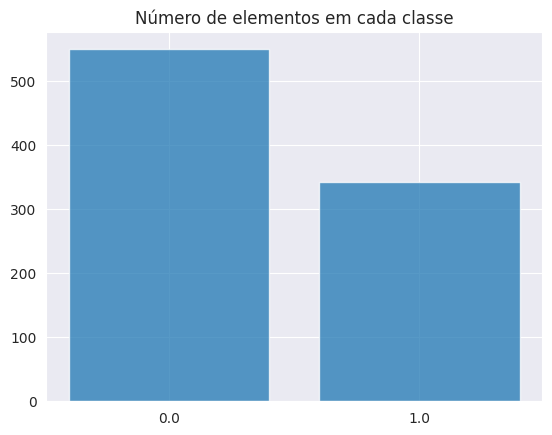

In [ ]:
classes = y_train
cl = np.unique(classes)
ncl = np.zeros(len(cl))

for i in np.arange(0, len(cl)):
    a = classes == cl[i]
    ncl[i] = len(classes[a])

numbers = np.arange(0, len(cl))
plt.bar(numbers, ncl,  alpha=.75)
plt.xticks(numbers, cl)
plt.title('Número de elementos em cada classe')
plt.show(True)

Normalizando os dados:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)

x_test = scaler.transform(x_test)

print('Dados transformados:')
print('Media: ', np.mean(x_train, axis = 0))
print('Desvio Padrao:', np.std(x_train, axis = 0))

print('Dados transformados:')
print('Media: ', np.mean(x_test, axis = 0))
print('Desvio Padrao:', np.std(x_test, axis = 0))

Dados transformados:
Media:  [-8.77213254e-17  4.38606627e-17  4.38606627e-17  5.38289951e-17
  3.98733297e-18  3.98733297e-17 -1.15632656e-16 -1.99366649e-17
  0.00000000e+00 -8.37339924e-17]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Dados transformados:
Media:  [-0.05156969  0.01081678 -0.06863058  0.01334498  0.06892064  0.02349348
 -0.02349348  0.14180391  0.08409087 -0.1771445 ]
Desvio Padrao: [1.00625661 0.98092175 0.81269066 1.21679298 1.12298531 1.00695788
 1.00695788 1.09804783 1.11376674 1.07106262]


## ***Etapa 3: Análise descritiva dos dados***

Para visualizar a correlação através da matriz de correlação:

In [ ]:
corr = train.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.050156,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.404262,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.074053
Age,-0.050156,-0.404262,1.000000,-0.243549,-0.175264,0.121044,-0.080281,0.080281,0.041805,-0.071663,0.008475
SibSp,-0.035322,0.083081,-0.243549,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.068734
Parch,0.081629,0.018443,-0.175264,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.060814
Fare,0.257307,-0.549500,0.121044,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.162184
Sex_female,0.543351,-0.131900,-0.080281,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.119224
Sex_male,-0.543351,0.131900,0.080281,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.119224
Embarked_C,0.168240,-0.243292,0.041805,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.782742
Embarked_Q,0.003650,0.221009,-0.071663,-0.026354,-0.081228,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.499421


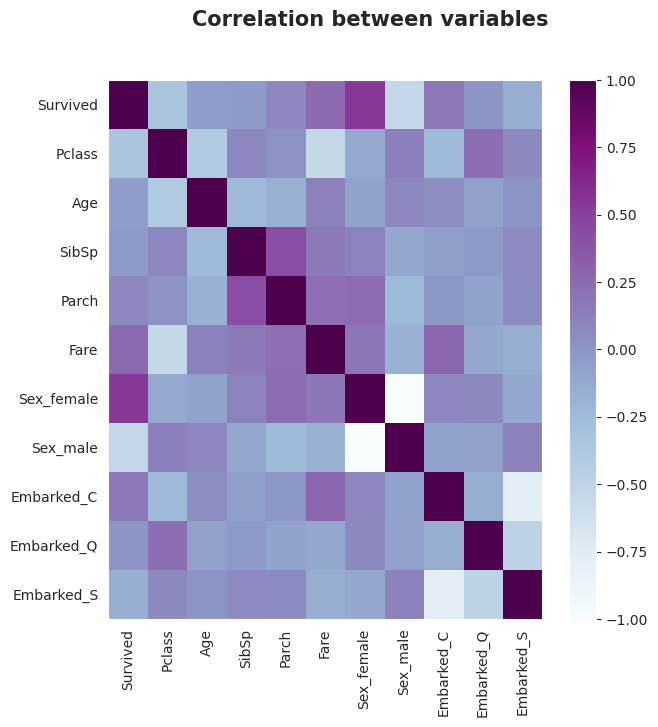

In [ ]:
plt.figure(figsize=(7, 7))
plt.imshow(corr, cmap='BuPu', interpolation='none', aspect='auto')
plt.colorbar()

plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

Apenas com a análise da matriz, vemos que há uma correlação entre sobreviventes e mulheres. Para analisar melhor este caso, podemos notar que:

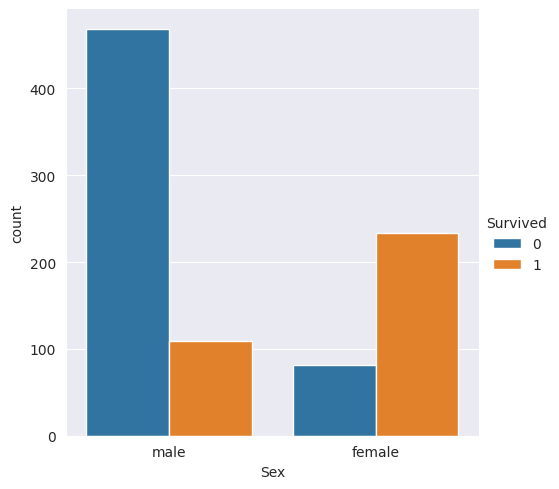

In [ ]:
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = train_original)

É notável que a maior parte das mulheres sobreviveram e a maior parte dos homens não sobreviveram.

Podemos também analisar a sobrevivência em relação à classe do passageiro:

<Axes: xlabel='Survived', ylabel='Pclass'>

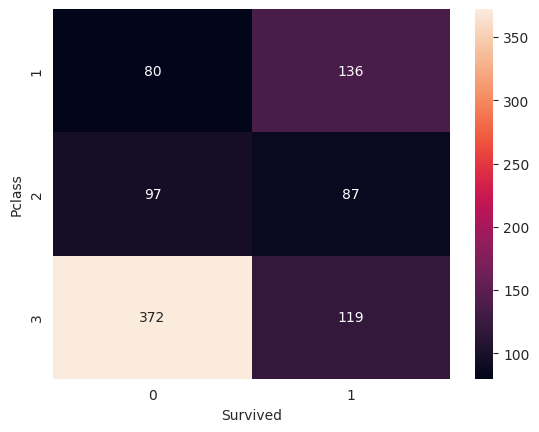

In [ ]:
group = train_original.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
sns.heatmap(pclass_survived, annot = True, fmt ="d")

É notável que a terceira classe foi a mais afetada, uma informação importante para a classificação. Pode-se também observar a correlação entre idade e sobrevivência:

<Axes: xlabel='Sex', ylabel='Age'>

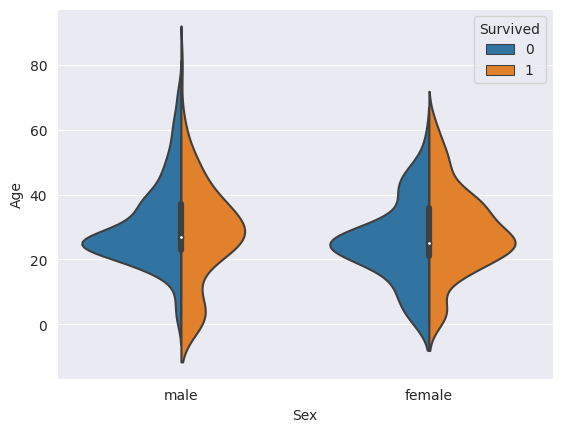

In [ ]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = train_original, split = True)

Outra variável é o preço do bilhete:

<Axes: xlabel='Fare_Range', ylabel='Survived'>

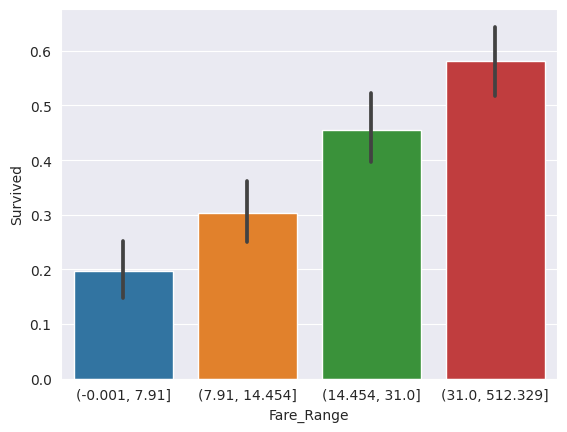

In [ ]:
train_original['Fare_Range'] = pd.qcut(train_original['Fare'], 4)

sns.barplot(x ='Fare_Range', y ='Survived',
data = train_original)

O número de sobreviventes aumenta assim como o preço do bilhete. Isso reforça que a classe do passageiro é um atributo importante. É possível também analisar o ponto de embarque dos passageiros:

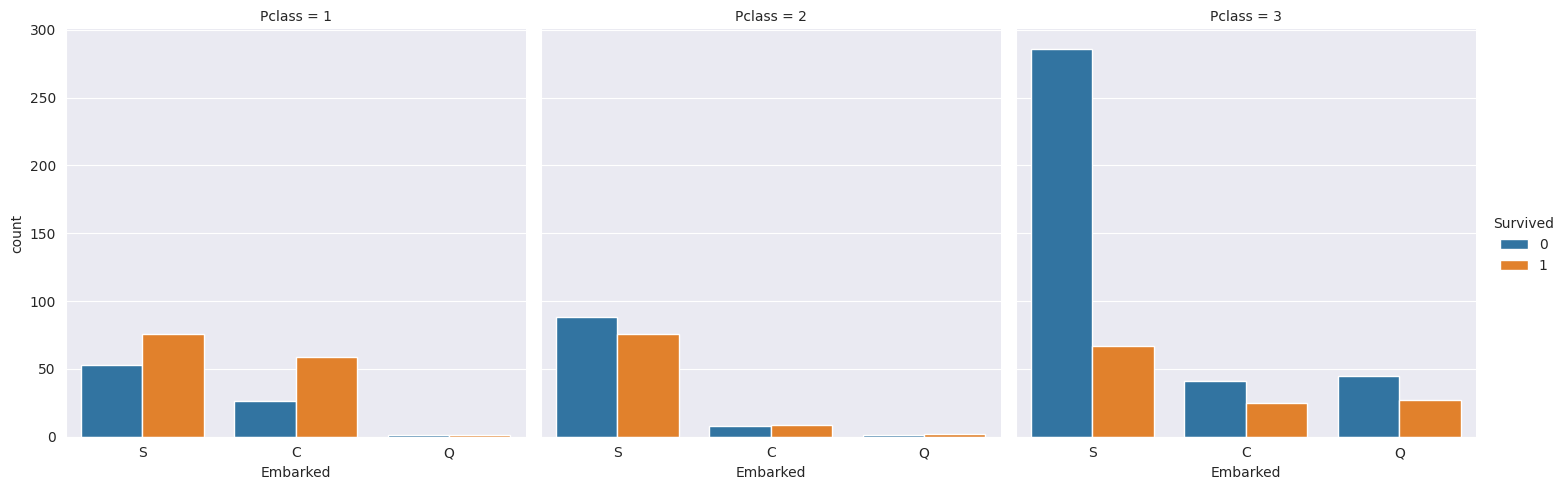

In [ ]:
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = train_original)

A maior parte dos sobreviventes é de Southampton (S), enquanto vemos que em Queenstown (Q) teve-se embarques majoritariamente da terceira classe, que já vimos que compõem a maioria dos não-sobreviventes.



Sabendo que os atributos são importantes para separar as classes, podemos ter uma ideia desta divisão utilizando o método PCA:

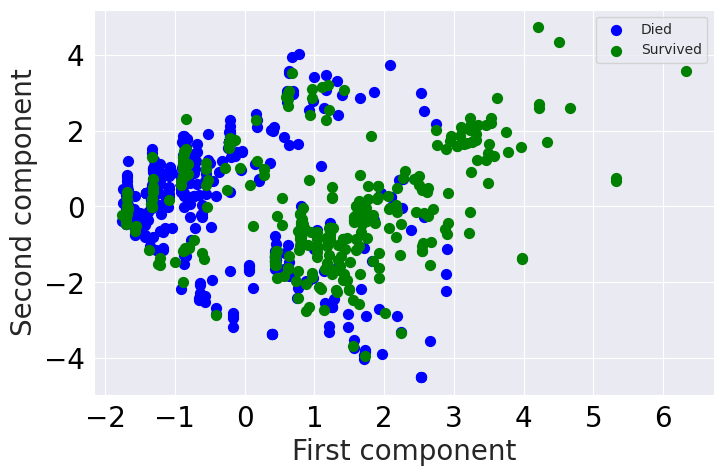

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_train)

classes = np.unique(y_train)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
aux = 0
plt.figure(figsize=(8,5))
for c in classes:
    if c == 1:
        lb = 'Survived'
    else:
        lb = 'Died'
    nodes = np.where(y_train == c)
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux],
                label = lb)
    aux = aux + 1
plt.legend()
plt.xlabel("First component", fontsize=20)
plt.ylabel("Second component", fontsize=20)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show(True)

Realizando o agrupamento utilizando o k-means:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


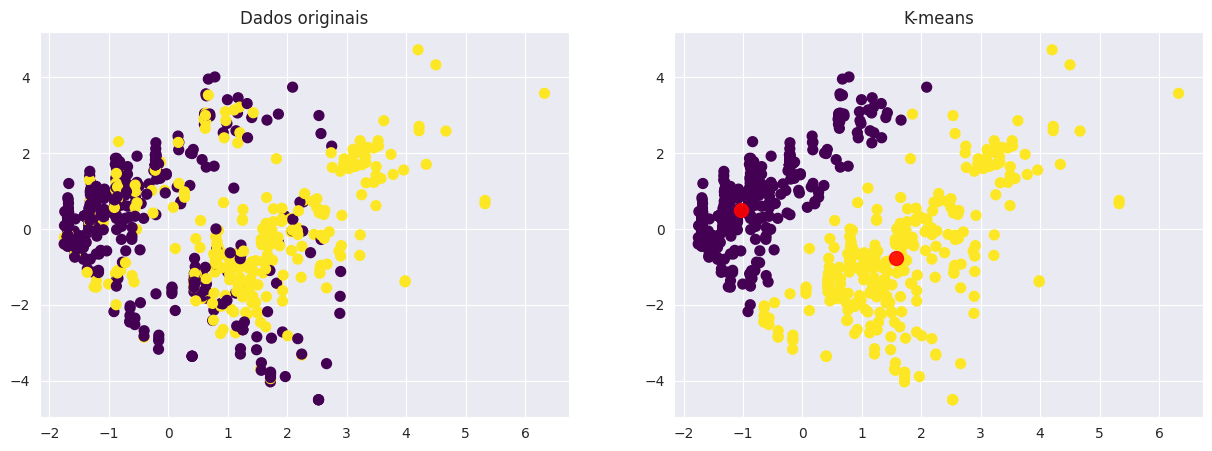

In [ ]:
from sklearn.cluster import KMeans
k = 2
kmeans = KMeans(n_clusters=k)

kmeans.fit(pca_result)
y_km = kmeans.fit_predict(pca_result)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 2)
plt.scatter(pca_result[:,0], pca_result[:,1], c=y_km, cmap='viridis', s=50)
plt.title('K-means')
centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9);

plt.subplot(1,2, 1)
plt.scatter(pca_result[:,0], pca_result[:,1], c=y_train, cmap='viridis', s=50)
plt.title('Dados originais')
plt.show(True)

In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score
print('Informação mútua normalizada:',
      normalized_mutual_info_score(y_km, y_train, average_method='arithmetic'))

Informação mútua normalizada: 0.19336775454090607


Podemos ver que o k-means não foi efetivo na separação entre classes, o que indica que precisamos de mais do que 2 dimensões para uma boa classificação. O próximo passo é justamente utilizar diferentes classificadores e vamos usar todos os atributos. É possível utilizar o PCA para reduzir as dimensões para outro número (já que vimos que 2 não é ideal) que mantenha uma boa precisão reduzindo a quantidade de atributos sem prejudicar a classificação.

## ***Etapa 4: Classificação***

Vamos testar alguns métodos diferentes e comparar sua performance.

### ***4.1 KNN***

O KNN depende de hiperparâmetros (número de vizinhos e métrica de distância). Para encontrar os valores ótimos, utilizamos a validação cruzada aninhada:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = [{'n_neighbors': np.arange(1, 51),
               'metric': ['euclidean', 'minkowski','chebyshev']}]

model = GridSearchCV(estimator = knn, param_grid = param_grid, cv=10,
                    scoring='roc_auc', return_train_score=False,verbose=1)

model.fit(x_train, y_train)
print(model.best_params_)
model.score(x_train, y_train)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
{'metric': 'euclidean', 'n_neighbors': 9}


0.9174362743531568

Treinando o modelo:

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-KNN.csv', index = False)

***Score no Kaggle: 0.77751***

Vamos avaliar outros métodos e a discussão é deixada para a etapa 5.

### ***4.2 Naive-Bayes***

Outro método que podemos testar é o Naive-Bayes. Ele depende que os dados estejam normalizados, mas já fizemos este passo anteriormente.

Utilizando o Naive-Bayes:

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred = np.array(y_pred, dtype = int)

prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-NB.csv', index = False)

***Score no Kaggle: 0.75358***

### ***4.3 Regressão logística***

Um classificador muito importante é a regressão logística (uma rede neural de um neurônio, basicamente), que faz a classificação através de uma curva logística. Vamos usar os dados transformados como anteriormente:

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
y_pred = np.array(y_pred, dtype = int)

prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-RL.csv', index = False)

***Score no Kaggle: 0.76315***.

### ***4.4 Support Vector Machine (SVM)***

Podemos também utilizar o Support Vector Machine (SVM), que encontra um hiperplano no espaço de atributos para separação de classes. Para saber se utilizar os dados reescalados melhora a performance do classificador, podemos testar:

In [ ]:
from sklearn.svm import SVC

In [ ]:
data_train = train.to_numpy()
nrow, ncol = data_train.shape

#dados que não serão normalizados, para comparação
y_train_nsc = data_train[:, 0]
x_train_nsc = data_train[:, 1:ncol]

data_test = test.to_numpy()
x_test_nsc = data_test

In [ ]:
from sklearn.model_selection import train_test_split
x_train_tnsc,  x_test_tnsc, y_train_tnsc, y_test_tnsc = train_test_split(x_train_nsc, y_train_nsc, test_size=0.3, random_state=42)
x_train_t, x_test_t, y_train_t, y_test_t = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

svc = SVC(random_state=42)
svc.fit(x_train_tnsc, y_train_tnsc)

y_pred_svm = svc.predict(x_test_tnsc)

accuracy_test_svm = accuracy_score(y_test_t, y_pred_svm)

print("SVM - without feature scaling")
print("Test accuracy:", accuracy_test_svm)

SVM - without feature scaling
Test accuracy: 0.6567164179104478


In [ ]:
svc = SVC(random_state=42)
svc.fit(x_train_t, y_train_t)

y_pred_svmsc = svc.predict(x_test_t)

accuracy_test_svmsc = accuracy_score(y_test_t, y_pred_svmsc)

print("SVM - with feature scaling")
print("Test accuracy:", accuracy_test_svmsc)

SVM - with feature scaling
Test accuracy: 0.8134328358208955


A acurácia melhora significantemente com o uso dos dados transformados. Por isso, no teste para o Kaggle estes são usados:

In [ ]:
svc = SVC(random_state=42)
svc.fit(x_train, y_train)

y_pred_svm = svc.predict(x_test)
y_pred_svm = np.array(y_pred, dtype = int)

prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred_svm

prediction.to_csv('Titanic-SVM.csv', index = False)

***Score no Kaggle: 0.76315***.

### ***4.5 Decision trees***

As árvores de decisão podem ter diferentes construções de acordo com o critério e profundidade escolhidas. Primeiro, podemos ver como essas escolhas afetam uma classificação:

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth' : np.arange(2,21),
              'criterion' :['gini', 'entropy']}

decision_tree = DecisionTreeClassifier(random_state=42)

model = GridSearchCV(estimator = decision_tree, param_grid = param_grid, cv=10,
                    verbose=True)

model.fit(x_train, y_train)

final_model = model.best_estimator_
final_model

Fitting 10 folds for each of 38 candidates, totalling 380 fits


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)

Vamos usar os hiperparâmetros fornecidos pela busca:

In [ ]:
decision_tree = DecisionTreeClassifier(criterion = final_model.criterion, max_depth = final_model.max_depth, random_state = 42)
decision_tree.fit(x_train, y_train)

y_pred_dt = decision_tree.predict(x_test)
y_pred_dt = np.array(y_pred, dtype = int)

prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred_dt

prediction.to_csv('Titanic-DT.csv', index = False)

Submetendo o resultado, obtemos:

**Score no Kaggle: 0.76315**

### ***4.6 Random Forest***

Assim como no KNN, o RandomForest depende de hiperparâmetros. Fazendo a validação cruzada (K-Fold):

Melhor n: 49  AUC: 0.8014322496675439


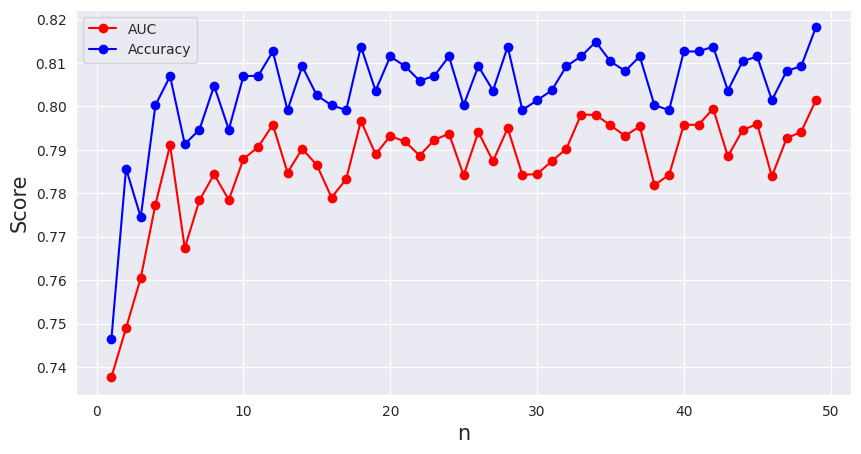

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

mauc = []
macc = []
vn = []
for n in range(1, 50):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(x_train, y_train):

        x_t, x_validation = x_train[train_index],x_train[test_index]
        y_t, y_validation = y_train[train_index], y_train[test_index]

        model = RandomForestClassifier(n_estimators=n)
        model.fit(x_t,y_t)
        y_pred = model.predict(x_validation)
        score = accuracy_score(y_pred, y_validation)

        vauc.append(roc_auc_score(y_validation, y_pred))
        vacc.append(accuracy_score(y_pred, y_validation))
    macc.append(np.mean(vacc))
    mauc.append(np.mean(vauc))
    vn.append(n)
best_n = np.argmax(mauc)+1
print('Melhor n:', best_n, ' AUC:',mauc[best_n-1])
plt.figure(figsize=(10,5))
plt.plot(vn, mauc, '-ro', label= 'AUC')
plt.plot(vn, macc, '-bo', label = 'Accuracy')
plt.xlabel('n', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

In [ ]:
model = RandomForestClassifier(n_estimators=best_n)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-RF.csv', index = False)

***Score no Kaggle: 0.76794***

Através do RandomForest podemos visualizar qual é a importância de cada atributo para a classificação:

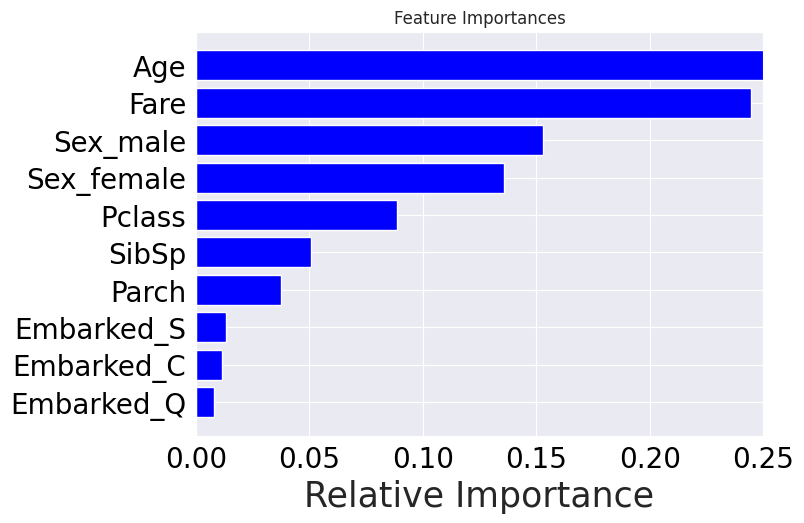

In [ ]:
importances = model.feature_importances_
attributes = train.columns[1:len(train.columns)]
indices = np.argsort(importances)
attributes_rank = []
for i in indices:
    attributes_rank.append(attributes[i])
plt.title('Feature Importances')
plt.tight_layout()
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), attributes_rank, fontsize=25)
plt.xlabel('Relative Importance',fontsize=25)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.xlim([0.0, 0.25])
plt.show()

Pode-se então avaliar o desempenho do classificador reduzindo o número de atributos e utilizando apenas alguns com maior importância:

In [ ]:
ns = 3 #numero de atributos selecionados
selected_attributes = []
for i in range(0,ns):
    selected_attributes.append(attributes_rank[::-1][i])
print('Selecionados:', selected_attributes)
data_train = train[selected_attributes]
data_train = data_train.to_numpy()
x_train = data_train

data_test = test[selected_attributes]
data_test = data_test.to_numpy()
x_test = data_test

Selecionados: ['Age', 'Fare', 'Sex_male']


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)

scaler = StandardScaler().fit(x_test)
x_test = scaler.transform(x_test)

print('Dados transformados:')
print('Media: ', np.mean(x_train, axis = 0))
print('Desvio Padrao:', np.std(x_train, axis = 0))

Dados transformados:
Media:  [ 4.38606627e-17  3.98733297e-18 -1.15632656e-16]
Desvio Padrao: [1. 1. 1.]


Melhor n: 27  AUC: 0.7713680219562573


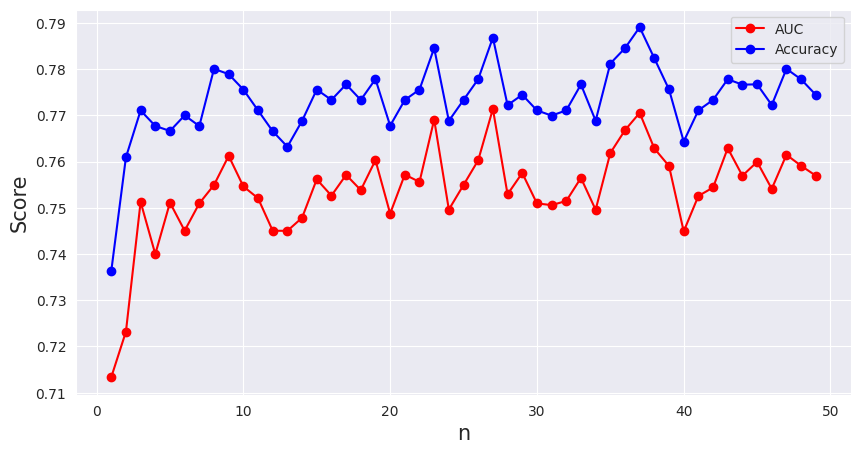

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
#cv = KFold(n_splits=10)
# enumerate the splits and summarize the distributions
mauc = []
macc = []
vn = []
for n in range(1, 50):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(x_train, y_train):
        # select rows
        x_t, x_validation = x_train[train_index], x_train[test_index]
        y_t, y_validation = y_train[train_index], y_train[test_index]

        model = RandomForestClassifier(n_estimators=n)
        model.fit(x_t,y_t)
        y_pred = model.predict(x_validation)
        score = accuracy_score(y_pred, y_validation)

        vauc.append(roc_auc_score(y_validation, y_pred))
        vacc.append(accuracy_score(y_pred, y_validation))
    macc.append(np.mean(vacc))
    mauc.append(np.mean(vauc))
    vn.append(n)
best_n = np.argmax(mauc)+1
print('Melhor n:', best_n, ' AUC:',mauc[best_n-1])
plt.figure(figsize=(10,5))
plt.plot(vn, mauc, '-ro', label= 'AUC')
plt.plot(vn, macc, '-bo', label = 'Accuracy')
plt.xlabel('n', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

In [ ]:
model = RandomForestClassifier(n_estimators=best_n)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-RF2.csv', index = False)

***Score no Kaggle: 0.74401***

## ***Etapa 5: Conclusões***

Após as análises dos dados e verificação da performance no Kaggle de vários métodos de classificação, podemos ver que os resultados no Kaggle são muito similares entre os diferentes métodos testados. É normal que os scores variem em algumas casas decimais para um mesmo classificador testado, por isso não podemos simplesmente dizer que um é melhor que o outro por conta de algumas casas decimais diferentes.

Como tivemos scores muito similares, é difícil apontar um modelo como melhor. O KNN e random forest tiveram os maiores scores, mas a diferença entre os outros não foi muito grande. Uma parte importante do trabalho foi avaliar os métodos e perceber quais precisamos de uma análise para determinar como ajustá-lo para sua melhor performance. Podemos também utilizar métodos ensemble em conjunto com as árvores.

Melhorar os resultados no Kaggle pode ser possível não só com métodos mais sofisticados, mas com ajustes nos parâmetros utilizados na classificação. Podemos aprofundar esta primeira etapa para melhorar nossos resultados. É importante também lembrar que há um certo nível de aleatoriedade no evento que gerou os dados, ou seja, nossos acertos mesmo com o melhor modelo possível estão limitados.